In [1]:
# Dependencies and Setup
# render the figure in a notebook instead of displaying a dump of the figure object.
%matplotlib inline  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from matplotlib.pyplot import figure
from matplotlib.pyplot import gcf


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#mouse data : Mouse ID	Drug
mouseData_df= pd.read_csv("data/mouse_drug_data.csv")
#trial data: Mouse ID	Timepoint	Tumor Volume (mm3)	Metastatic Sites
trialData_df= pd.read_csv("data/clinicaltrial_data.csv")

In [2]:
allData_df=pd.merge(mouseData_df,trialData_df, on=["Mouse ID","Mouse ID"])
dtgroup=allData_df.groupby(['Drug','Timepoint'])
errdf=dtgroup['Tumor Volume (mm3)'].agg([np.mean, sem]).reset_index()
errdf.head()

,Drug,Timepoint,mean,sem
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731


In [3]:
meandf=errdf.drop(columns=['sem']) 
tmeandf=meandf.set_index('Timepoint')
pdf=tmeandf.pivot(columns='Drug', values='mean')
pdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


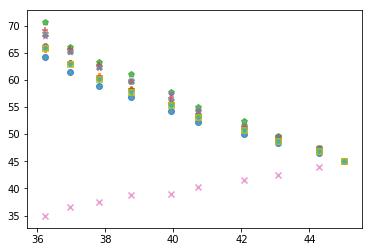

In [15]:
#Creating a scatter plot that shows how the tumor volume changes over time for each treatment.

#plt.scatter(x_axis, data, marker="o", facecolors="green", edgecolors="red",s=x_axis, alpha=0.75)
plt.scatter(pdf.iloc[:,0], pdf.iloc[:,1], label="Capomulin", marker="o", alpha=0.75)  
plt.scatter(pdf.iloc[:,0], pdf.iloc[:,2],  label="Ceftamin" , marker='P', alpha=0.75)  
plt.scatter(pdf.iloc[:,0], pdf.iloc[:,3],  label="Infubinol", marker='p', alpha=0.75)  
plt.scatter(pdf.iloc[:,0], pdf.iloc[:,4],  label="Ketapril", marker='+', alpha=0.75)  
plt.scatter(pdf.iloc[:,0], pdf.iloc[:,5],  label="Naftisol", marker='*', alpha=0.75)  
plt.scatter(pdf.iloc[:,0], pdf.iloc[:,6],  label="Placebo", marker='8', alpha=0.75)  
plt.scatter(pdf.iloc[:,0], pdf.iloc[:,7],  label="Propriva", marker='x', alpha=0.75)  
plt.scatter(pdf.iloc[:,0], pdf.iloc[:,8],  label="Ramicane", marker='X', alpha=0.75)  
plt.scatter(pdf.iloc[:,0], pdf.iloc[:,9],  label="Stelasyn", marker='s', alpha=0.75)  
plt.scatter(pdf.iloc[:,0], pdf.iloc[:,9],  label="Zoniferol", marker='.', alpha=0.75)  
plt.ylabel="Mean Tumor Volume"
plt.xlabel="Time (Days)"



In [5]:
semdf=errdf.drop(columns=['mean']) 
tsemdf=semdf.set_index('Timepoint')
psdf=tsemdf.pivot(columns='Drug', values='sem')
psdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


TypeError: cannot unpack non-iterable PathCollection object

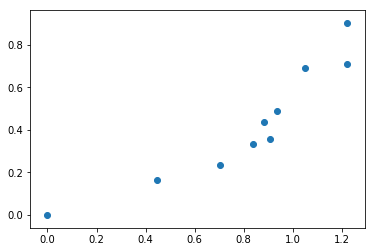

In [ ]:
pdfi=pdf.reset_index()
# Plot the world average as a line chart
Capomulin, = plt.plot(pdfi.iloc[:,0], pdfi.iloc[:,1],  label="Capomulin" , marker='P')
Ceftamin, = plt.plot(pdfi.iloc[:,0], pdfi.iloc[:,2],  label="Ceftamin" , marker='P')
Infubinol, = plt.plot(pdfi.iloc[:,0], pdfi.iloc[:,3],  label="Infubinol", marker='P')
Ketapril, = plt.plot(pdfi.iloc[:,0], pdfi.iloc[:,4],  label="Ketapril", marker='P')
Naftisol, = plt.plot(pdfi.iloc[:,0], pdfi.iloc[:,5],  label="Naftisol", marker='P')
Placebo, =  plt.plot(pdfi.iloc[:,0], pdfi.iloc[:,6],  label="Placebo", marker='P')
Propriva, = plt.plot(pdfi.iloc[:,0], pdfi.iloc[:,7],  label="Propriva", marker='P')
Ramicane, = plt.plot(pdfi.iloc[:,0], pdfi.iloc[:,8],  label="Ramicane", marker='P')
Stelasyn, = plt.plot(pdfi.iloc[:,0], pdfi.iloc[:,9],  label="Stelasyn", marker='P')
Zoniferol, = plt.plot(pdfi.iloc[:,0], pdfi.iloc[:,9],  label="Zoniferol", marker='P')
plt.rcParams["figure.figsize"] = [17,7] # make bigger for all those lines
plt.xlabel("Time (days)")
plt.ylabel("Mean Tumor Volume (m3)")
plt.grid(axis='x', linestyle='--')
plt.legend(handles=[Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol], loc="best")
plt.tight_layout()
plt.savefig("Images/MeanTumorVolume.png")
plt.show()

In [ ]:
#= error graph